# Information

## **Students Information:**


1. Student 1
  * Name = Peyman 
  * Last Name = Naseri
  * Student ID = 4011305965014
2. Student 2
  * Name = Maryam
  * Last Name = HokmAbadi
  * Student ID = 4011305965011




## **Project Information:**
* Course: Applied Data Science
* colab: [link](https://colab.research.google.com/github/peyman886/ADS/blob/main/3_Classification/Classification.ipynb) 
* github: [link](https://github.com/peyman886/ADS/tree/main/3_Classification/Classification.ipynb)

# Required libraries

In [8]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns               
%matplotlib inline
sns.set()
plt.style.use("ggplot")

import warnings                                            
warnings.filterwarnings('ignore')

In [9]:
from PIL import Image
from sklearn import datasets, metrics
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score


from sklearn.model_selection import train_test_split 


from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


# Binary Calssification

## load and show data

,X1,X2,Y
0,0.004291,-0.174600,-1
1,2.225050,0.117181,1
2,0.274173,-0.514910,-1
3,-1.045133,-0.798009,1
4,1.611457,0.239339,1


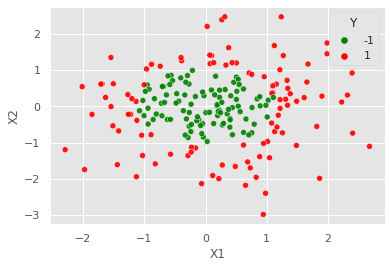

In [5]:
df = pd.read_csv("data.csv")
df = df.drop(columns = ['Unnamed: 0'])
sns.scatterplot(data = df, x='X1', y='X2',hue='Y',alpha=.9, palette=['green', 'red'])
df.head()

## split data into training and test sets

In [6]:
y = df['Y'].to_numpy()
X = df.drop(columns=['Y']).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (160, 2)
shape X_test: (40, 2)

shape y_test: (40,)
shape y_train: (160,)


## Models

In [7]:


def training(model):
  # print(model)
  model.fit(X_train, y_train)
  predicted = model.predict(X_test)
  print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predicted)}\n"
    )
  disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, predicted)
  disp.figure_.suptitle("Confusion Matrix")
  # print(f"Confusion matrix:\n{disp.confusion_matrix}")
  plt.show()
  print('\n\n\n')
  

In [8]:



models = [
    LogisticRegression(),
    svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma=1),
    KNeighborsClassifier(n_neighbors=3),
    DecisionTreeClassifier(random_state=0, max_depth=3),
    RandomForestClassifier(max_depth=3, random_state=0),
    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),n_estimators=100)
]

Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

          -1       0.43      0.24      0.31        25
           1       0.27      0.47      0.34        15

    accuracy                           0.33        40
   macro avg       0.35      0.35      0.32        40
weighted avg       0.37      0.33      0.32        40




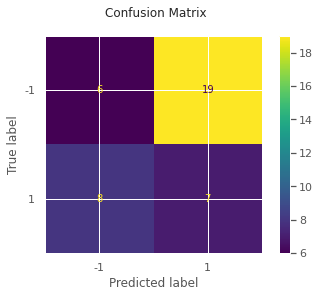





Classification report for classifier SVC(kernel='linear'):
              precision    recall  f1-score   support

          -1       0.62      0.60      0.61        25
           1       0.38      0.40      0.39        15

    accuracy                           0.53        40
   macro avg       0.50      0.50      0.50        40
weighted avg       0.53      0.53      0.53        40




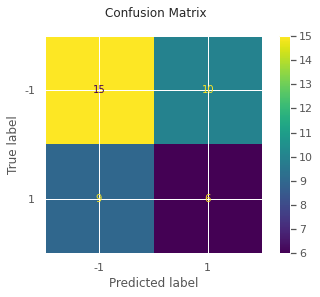





Classification report for classifier SVC(gamma=1):
              precision    recall  f1-score   support

          -1       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40




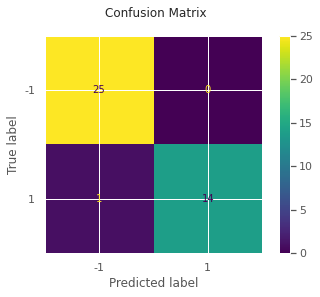





Classification report for classifier KNeighborsClassifier(n_neighbors=3):
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40




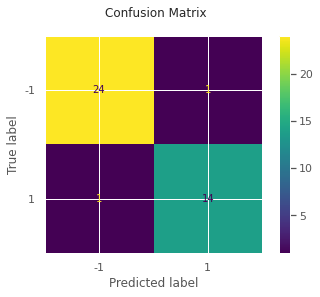





Classification report for classifier DecisionTreeClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

          -1       0.83      0.96      0.89        25
           1       0.91      0.67      0.77        15

    accuracy                           0.85        40
   macro avg       0.87      0.81      0.83        40
weighted avg       0.86      0.85      0.84        40




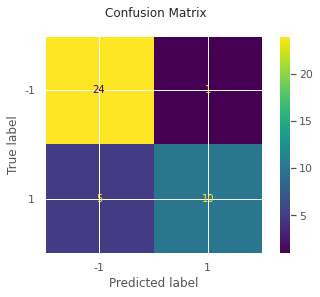





Classification report for classifier RandomForestClassifier(max_depth=3, random_state=0):
              precision    recall  f1-score   support

          -1       0.96      0.96      0.96        25
           1       0.93      0.93      0.93        15

    accuracy                           0.95        40
   macro avg       0.95      0.95      0.95        40
weighted avg       0.95      0.95      0.95        40




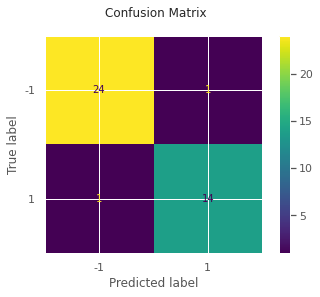





Classification report for classifier AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100):
              precision    recall  f1-score   support

          -1       1.00      0.92      0.96        25
           1       0.88      1.00      0.94        15

    accuracy                           0.95        40
   macro avg       0.94      0.96      0.95        40
weighted avg       0.96      0.95      0.95        40




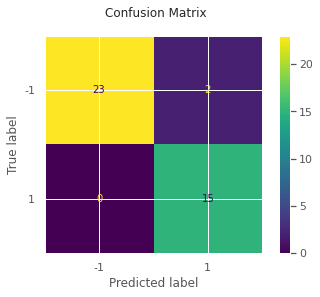

In [9]:
for model in models:
  training(model)

## tuning hyperparameters

In [10]:

def tuning(model,param_grid, X=X_train, y=y_train):
  # define the model with default hyperparameters
  print('hyperparameters of model :',list(model.get_params().keys()))

  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)  #evaluation procedure
  grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy') #search procedure
  grid_result = grid_search.fit(X, y)

  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  
  return grid_result.best_estimator_


### knn

hyperparameters of model : ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Best: 0.929167 using {'n_neighbors': 5}
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94        25
           1       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40




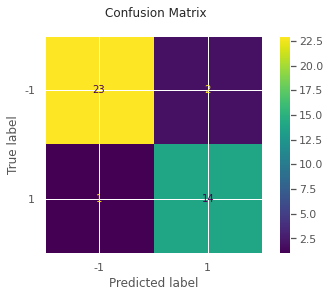

In [11]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,3,4, 5, 7, 10, 20, 50]
}
best_knn = tuning(knn,param_grid)
training(best_knn)

### Decision Tree

hyperparameters of model : ['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter']
Best: 0.918750 using {'max_depth': 11}
Classification report for classifier DecisionTreeClassifier(max_depth=11):
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94        25
           1       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40




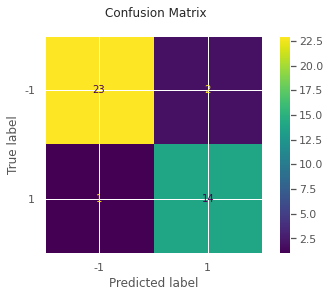

In [12]:
DTree = DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(20))
}
best_DTree = tuning(DTree,param_grid)
training(best_DTree)

# Multi-Class Clssification

### Load and show some of data points

In [10]:
mnist = datasets.fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
print(X.shape, y.shape)

(70000, 784) (70000,)


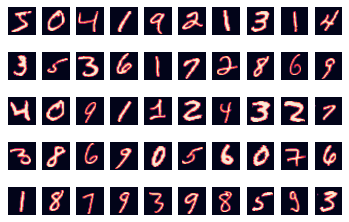

In [12]:
def show_images(num_images):
    if num_images % 10 == 0 and num_images <= 100:
        for digit_num in range(0,num_images): 
            plt.subplot(num_images/10,10,digit_num+1) #create subplots
            mat_data = X[digit_num].reshape(28,28)  #reshape images
            plt.imshow(mat_data) #plot the data
            plt.xticks([]) #removes numbered labels on x-axis
            plt.yticks([]) #removes numbered labels on y-axis
show_images(50) 

### split data into training and test sets

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=43, shuffle=True)

print('shape X_train:', X_train.shape)
print('shape X_test:', X_test.shape)
print()
print('shape y_test:', y_test.shape)
print('shape y_train:', y_train.shape)

shape X_train: (56000, 784)
shape X_test: (14000, 784)

shape y_test: (14000,)
shape y_train: (56000,)


### Models

In [14]:
! pip install catboost
! pip install xgboost
! pip install lightgbm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 136 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Classification report for classifier LogisticRegression():
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1366
           1       0.95      0.97      0.96      1531
           2       0.92      0.90      0.91      1422
           3       0.89      0.91      0.90      1402
           4       0.93      0.93      0.93      1353
           5       0.90      0.86      0.88      1297
           6       0.95      0.95      0.95      1426
           7       0.94      0.93      0.93      1474
           8       0.88      0.88      0.88      1355
           9       0.89      0.90      0.90      1374

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000




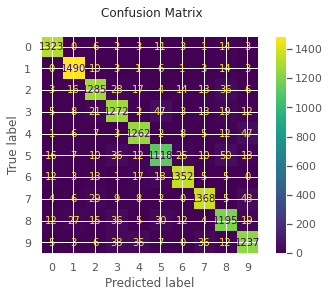

In [30]:
model = LogisticRegression(solver = 'lbfgs')
training(model)

In [ ]:
model = svm.SVC(kernel='linear')
training(model)

In [ ]:
import xgboost as xgb
models = [
    

    LogisticRegression(multi_class='ovr'),
    LogisticRegression(multi_class='multinomial'),


    KNeighborsClassifier(n_neighbors=3),

    DecisionTreeClassifier(random_state=0, max_depth=3),
    RandomForestClassifier(max_depth=3, random_state=0),

    AdaBoostClassifier(
        DecisionTreeClassifier(max_depth=1),n_estimators=100
        ),

    xgb.XGBClassifier(
        tree_method = 'gpu_hist',
        n_jobs=-1,
        n_estimators=1000,
        max_depth=16,
        colsample_bytree=0.8, 
        subsample=0.8, 
        learning_rate=0.2,
        min_child_weight=6
    )
    # svm.SVC(kernel='linear'),
    svm.SVC(kernel='rbf', gamma=1),
    svm.SVC(kernel='rbf', gamma=0.5, C=0.1)

]

In [ ]:
for model in models:
  training(model)

#### XGBoost

In [20]:
import xgboost as xgb
model = xgb.XGBClassifier(
    # # objective='multi:logistic',
    tree_method = 'gpu_hist',
    n_jobs=-1,
    n_estimators=1000,
    max_depth=16,
    colsample_bytree=0.8, 
    subsample=0.8, 
    learning_rate=0.2,
    min_child_weight=6,
)

model.fit(
    X_train, 
    y_train, 
    # eval_metric=['logloss'], 
    # eval_set=[(X_train, y_train), (x_val, y_val)], 
    # verbose=True, 
    # early_stopping_rounds = 20
)

# plt.rcParams['figure.facecolor'] = 'white'
# evals_result = model.evals_result()

KeyboardInterrupt: ignored

In [17]:

# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('\n\n\n')
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()

Accuracy: 97.65%






AttributeError: ignored

In [ ]:
r = metrics.classification_report(y_test, predictions)
print(r)

#### LightGBM


In [ ]:
from typing import Generator
train_size = 0.7
validation_size = 0.2
test_size = 0.1

# train dataset
train_gf= gf.sample(frac=train_size,random_state=200) #random state is a seed value
temp= gf.drop(train_gf.index)
# validation dataset
val_gf = temp.sample(frac=validation_size/(1-train_size),random_state=201)
# test dataset
test_gf = temp.drop(val_gf.index)


print("train size: ", len(train_gf))
print("valid size: ", len(val_gf))
print("test size : ", len(test_gf))

target = 'Sale'
predictors = list(gf.columns)
predictors.remove('Sale')
categorical = list(gf.select_dtypes('object').columns)

In [24]:
import lightgbm as lgb

def lgb_modelfit_nocv(params, dtrain, dvalid, predictors, target='target', objective='binary', metrics='auc',
                 feval=None, early_stopping_rounds=20, num_boost_round=3000, verbose_eval=10, categorical_features=None):
    lgb_params = {
        'boosting_type': 'gbdt',
        'objective': objective,
        'metric':metrics,
        'learning_rate': 0.01,
        'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
        'max_depth': -1,  # -1 means no limit
        'min_child_samples': 20,  # Minimum number of data need in a child(min_data_in_leaf)
        'max_bin': 255,  # Number of bucketed bin for feature values
        'subsample': 0.6,  # Subsample ratio of the training instance.
        'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
        'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
        'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
        'metric':metrics
    }

    lgb_params.update(params)

    print("preparing validation datasets")

    xgtrain = lgb.Dataset(dtrain[predictors].values, label=dtrain[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )
    xgvalid = lgb.Dataset(dvalid[predictors].values, label=dvalid[target].values,
                          feature_name=predictors,
                          categorical_feature=categorical_features
                          )
    
    evals_results = {}

    bst1 = lgb.train(lgb_params, 
                     xgtrain, 
                     valid_sets=[xgtrain, xgvalid], 
                     valid_names=['train','valid'], 
                     evals_result=evals_results, 
                     num_boost_round=num_boost_round,
                     early_stopping_rounds=early_stopping_rounds,
                     verbose_eval=10, 
                     feval=feval)

    n_estimators = bst1.best_iteration
    print("\nModel Report")
    print("n_estimators : ", n_estimators)
    print(metrics+":", evals_results['valid'][metrics][n_estimators-1])

    return bst1

In [27]:
print("Training...")
params = {
    'learning_rate': 0.1,
    'num_leaves': 7,  # we should let it be smaller than 2^(max_depth)
    'max_depth': 3,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 100,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 1,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.7,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 0,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'scale_pos_weight':99 # because training data is extremely unbalanced 
}
bst = lgb_modelfit_nocv(params, 
                        # train_gf,
                        # val_gf,
                        # predictors, 
                        # target, 
                        # objective='binary', 
                        metrics='auc',
                        # early_stopping_rounds=100, 
                        # verbose_eval=True, 
                        num_boost_round=300, 
                        # categorical_features=categorical
                        )

Training...
preparing validation datasets

Model Report
n_estimators :  0


In [28]:
# make predictions for test data
y_pred = bst.predict(test_gf[predictors])
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(test_gf['Sale'].values, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print('\n\n\n')

NameError: ignored

In [40]:
import numpy as np 
import lightgbm as lgb

data = X_train
label = y_train
train_data = lgb.Dataset(data, label=label, free_raw_data=False)
params = {
    'learning_rate': 0.01,
    'num_leaves': 31,  # we should let it be smaller than 2^(max_depth)
    'max_depth': 3,  # -1 means no limit
    'min_child_samples': 100,  # Minimum number of data need in a child(min_data_in_leaf)
    'max_bin': 225,  # Number of bucketed bin for feature values
    'subsample': 0.7,  # Subsample ratio of the training instance.
    'subsample_freq': 0,  # frequence of subsample, <=0 means no enable
    'colsample_bytree': 0.3,  # Subsample ratio of columns when constructing each tree.
    'min_child_weight': 5,  # Minimum sum of instance weight(hessian) needed in a child(leaf)
    'scale_pos_weight':99, # because training data is extremely unbalanced 
    'boosting_type': 'gbdt',
         'metrics' : 'auc',
        'subsample_for_bin': 200000,  # Number of samples for constructing bin
        'min_split_gain': 0,  # lambda_l1, lambda_l2 and min_gain_to_split to regularization
        'reg_alpha': 0,  # L1 regularization term on weights
        'reg_lambda': 0,  # L2 regularization term on weights
        'nthread': 8,
        'verbose': 0,
}
gbm_2 = lgb.train(params, train_data, num_boost_round = 300,verbose_eval=10,early_stopping_rounds=100
                init_model = gbm_init)
print("Option 2 current iter# %d" %gbm_2.current_iteration())

Option 2 current iter# 20


In [41]:
y_pred = bst.predict(X_test)

In [42]:
predictions = [round(value) for value in y_pred]

In [43]:
r = metrics.classification_report(y_test,predictions)
print(r)

              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.00      0.00      0.00         0
           0       0.93      0.41      0.57      1366
           1       0.66      0.67      0.67      1531
           2       0.46      0.40      0.43      1422
           3       0.41      0.40      0.40      1402
           4       0.29      0.36      0.32      1353
           5       0.28      0.46      0.35      1297
           6       0.39      0.53      0.45      1426
           7       0.45      0.46      0.46      1474
           8       0.26      0.25      0.26      1355
           9       0.78      0.29      0.42      1374
          10       0.00      0.00      0.00         0

    accuracy                           0.43     14000
   macro avg       0.38      0.33      0.33     14000
weighted avg       0.49      0.43      0.44     14000



## tuning hyperparameters

### knn

hyperparameters of model : ['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights']
Best: 0.929167 using {'n_neighbors': 5}
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

          -1       0.96      0.92      0.94        25
           1       0.88      0.93      0.90        15

    accuracy                           0.93        40
   macro avg       0.92      0.93      0.92        40
weighted avg       0.93      0.93      0.93        40




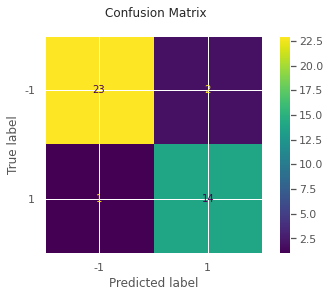

In [ ]:
knn = KNeighborsClassifier()
param_grid = {
    'n_neighbors': [2,3,4, 5, 7, 10, 20, 50]
}
best_knn = tuning(knn,param_grid)
training(best_knn)

### AdaBoost

In [ ]:
adaboost = AdaBoostClassifier()
  # define the grid of hyperparameters to search
param_grid = {
    'n_estimators' : [10, 50, 100, 500],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1.0],
    'base_estimator' : [DecisionTreeClassifier(max_depth=i) for i in range(1,5)]
}
best_adaboost = tuning(adaboost,param_grid)
training(best_adaboost)